In [1]:
import sys
sys.path.insert(0,"/root/workspace/fuggle")


In [2]:
from fuggle import setup, Dag, PlotLine
from fugue import NativeExecutionEngine
import pandas as pd

In [3]:
setup("spark")

SparkExecutionEngine is set as backend


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 43574)
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/lib/python3.7/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/lib/python3.7/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/local/lib/python3.7/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/local/lib/python3.7/site-packages/pyspark/accumulators.py", line 266, in handle
    poll(authenticate_and_accum_updates)
  File "/usr/local/lib/python3.7/site-packages/pyspark/accumulators.py", line 241, in poll
    if func():
  File "/usr/local/lib/python3.7/site-packages/pyspark/accumulators.py", line 256, in authenticate_and_accum_upda

<IPython.core.display.Javascript object>

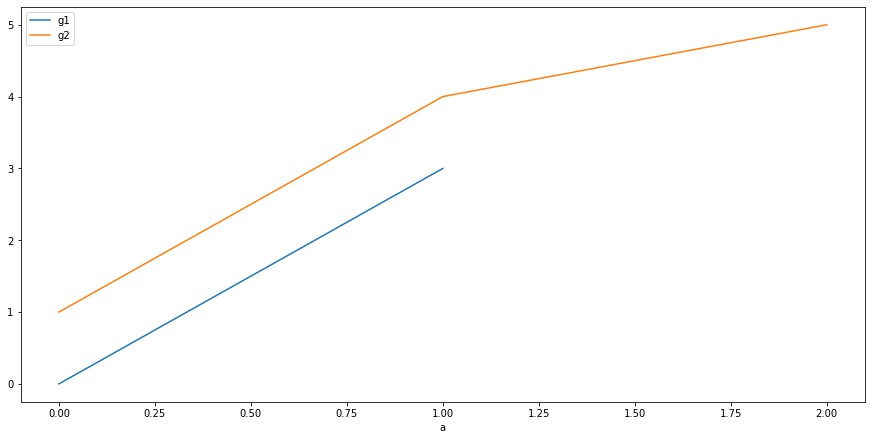

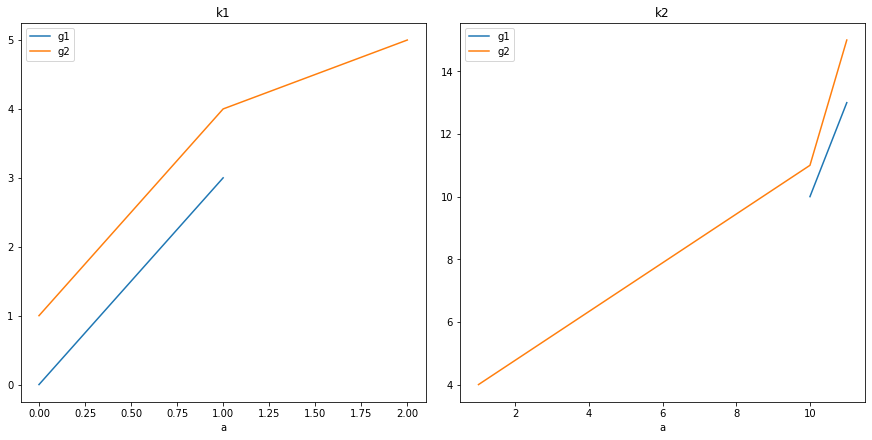

In [6]:
dag = Dag()
df = dag.df([[0,0,"g1"],[1,3,"g1"],[0,1,"g2"],[2,5,"g2"],[1,4,"g2"]],"a:int,b:int,c:str").deterministic_checkpoint()
df.output(PlotLine, params=dict(x="a",y="b",group="c"))

df = dag.df([
    [0,0,"g1","k1"],[1,3,"g1","k1"],[0,1,"g2","k1"],[2,5,"g2","k1"],[1,4,"g2","k1"],
    [10,10,"g1","k2"],[11,13,"g1","k2"],[10,11,"g2","k2"],[11,15,"g2","k2"],[1,4,"g2","k2"],
],"a:int,b:int,c:str,d:str").deterministic_checkpoint()
df.partition(by=["d"]).output(PlotLine, params=dict(x="a",y="b",group="c", width=0.5))
dag.run()

In [ ]:
%%fsql
CREATE [[0]] SCHEMA a:int
PRINT ROWCOUNT

In [ ]:
# schema: *
def tr(df:pd.DataFrame) -> pd.DataFrame:
    return df

In [ ]:
%%fsql
CREATE [[0]] SCHEMA a:int
TRANSFORM USING tr
PRINT ROWCOUNT